

Master's Degree in Business Intelligence

***Members: Alejandro Galindo Valencia, Carla Moreno Molina***

#  360° View of Adventureworks Customers: Advanced Customer Data Analysis

AdventureWorks is a multinational manufacturing company that produces and distributes bicycles, parts, and accessories for commercial markets in North America, Europe, and Asia. As part of its digital transformation project, AdventureWorks is carrying out projects in various areas, including conducting a 360° analysis of its customers to gain useful insights for decision-making and the design of new commercial strategies.

This project is structured in four stages:

1. **Data Understanding**: Conduct a descriptive analysis of the data.

2. **Data Preparation**: Conduct data cleansing, transformation, and normalization.

3. **Data Modeling**: Segment your customers using machine learning techniques.

4. **Evaluation and Results Collection**: Evaluate the model and prepare the results report.

### Adventureworks Customer Dataset Description:

- **TotalAmount**: Budget submitted to the customer
- **Bicycle Purchase**: 0 - No purchase;
1 - Purchase
- **CustomerID**: Customer identifier
- **PersonType**: Person type: IN
- **Date of Birth**: Date of birth
- **Age**: Age
- **Marital Status**: Marital status: M - Married; S - Single
- **Gender**: Gender: F - Female; M - Male
- **TotalChildren**: Total number of children
- **HomeOwnerFlag**: 0 - Does not own a home; 1 - Owns at least one home
- **NumberCarsOwned**: Number of cars owned
- **CountryRegionCode_Num**: Geographic region the customer belongs to: 0 - AU; 1 - CA; 2 - DE; 3 - FR; 4 - GB; 5 - USA
- **YearlyIncome_Num**: Annual income range. 0 - 25,000; 1 - 25,000; 2 - 5,000; 3 - 75,000; 4 - greater than 100,000
- **Education_Num**: Education level: 0 - Bachelor's Degree; 1 - High School; 2 - College; 3 - Graduate Degree 4 - Bachelor's Degree
- **Occupation Number**: Professional occupation: 0 - Partial Baccalaureate; 1 - Baccalaureate; 2 - Partial University; 3 - Postgraduate; 4 - Bachelor's Degree

#Stage 1: Understanding the Data

In this stage, a basic data analysis will be conducted. Specifically, a descriptive analysis will identify the number of variables in the dataset, the type of data, the main statistical measures, and correlations between variables, among other aspects.

In [1]:
# We import the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Upload CSV file manually (for Google Colab)
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

# Assuming the uploaded file is named 'dataset_AW.csv'
df = pd.read_csv(io.BytesIO(uploaded['dataset_AW.csv']))
print("Dataset loaded successfully.")


Saving dataset_AW.csv to dataset_AW.csv
Dataset loaded successfully.


In [4]:
# We read the dataset
import io
data = pd.read_csv(io.BytesIO(uploaded['dataset_AW.csv']), sep=',')
data.head(10)

,TotalAmount,BikePurchase,CustomerID,PersonType,BirthDate,Age,MaritalStatus,Gender,TotalChildren,HomeOwnerFlag,NumberCarsOwned,CountryRegionCode_Num,YearlyIncome_Num,Education_Num,Occupation_Num
0,8139.2900,1,11003,IN,1968,52,S,F,0,0,1,0,2,4,3
1,2994.0882,1,14501,IN,1938,82,M,M,4,1,2,5,3,3,4
2,4118.2600,1,21768,IN,1946,74,S,M,5,1,3,1,2,4,4
3,4631.1100,1,25863,IN,1946,74,S,F,5,1,3,5,1,1,3
4,3399.9900,1,28389,IN,1964,56,S,F,3,0,0,3,0,1,0
5,8121.3300,1,11005,IN,1965,55,S,M,0,1,1,0,2,4,3
6,8133.0400,1,11011,IN,1963,57,M,M,4,1,4,0,2,4,3
7,5938.2500,1,16624,IN,1972,48,S,M,0,0,3,0,3,4,3
8,6051.3100,1,27645,IN,1961,59,M,M,1,1,4,5,4,1,3
9,5873.2600,1,16351,IN,1954,66,S,F,2,0,2,0,3,2,1


In [6]:
# We see the number of instances and variables that the dataset has
data.shape

(18484, 15)

In [7]:
# We generate descriptive statistics from the data
data.describe()

,TotalAmount,BikePurchase,CustomerID,BirthDate,Age,TotalChildren,HomeOwnerFlag,NumberCarsOwned,CountryRegionCode_Num,YearlyIncome_Num,Education_Num,Occupation_Num
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,1588.329216,0.494049,20241.500000,1961.579961,58.420039,1.844352,0.676369,1.502705,3.100411,1.700335,2.402781,2.125784
std,2124.231717,0.499978,5336.015523,11.249188,11.249188,1.612408,0.467874,1.138394,1.992596,1.162898,1.299917,1.308386
min,2.290000,0.000000,11000.000000,1910.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.970000,0.000000,15620.750000,1954.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,270.265000,0.000000,20241.500000,1963.000000,57.000000,2.000000,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000
75%,2511.275000,1.000000,24862.250000,1970.000000,66.000000,3.000000,1.000000,2.000000,5.000000,2.000000,4.000000,3.000000
max,13295.380000,1.000000,29483.000000,1980.000000,110.000000,5.000000,1.000000,4.000000,5.000000,4.000000,4.000000,4.000000


**Analysis in general terms of the distribution of the data: count, mean, std, min and max and quartiles:** Count: Indicates how much valid data is available for a specific variable. This is useful for identifying the amount of data available and detecting possible missing data. Mean: Provides a measure of center for a variable, useful for understanding the central tendency of the data. Std: Indicates how spread out the data is around the mean. A high standard deviation means the data is very spread out. Min: The smallest value for a variable. Max: The largest value for a variable. 25%: The value below which 25% of the data fall. 50%: The middle value that divides the data into two equal halves. 75%: The value below which 75% of the data fall. Most variables are categorical. If we focus on the TotalAmount variable, we can draw the following conclusions: It is observed that it has no missing data, so all of the data (18,484) are valid. The budget presented to the client has a mean and standard deviation of 1588.32 and 2124.23 respectively, representing a very high dispersion. The minimum budget presented is 2.29, and the maximum is 13295.38. Regarding percentiles, 25% of the data fall below 49.97, 50% fall below 270.26, and 75% fall below 2511.27.

In [8]:
# We see what type of variables the dataset contains and which values ​​do not contain nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TotalAmount            18484 non-null  float64
 1   BikePurchase           18484 non-null  int64  
 2   CustomerID             18484 non-null  int64  
 3   PersonType             18484 non-null  object 
 4   BirthDate              18484 non-null  int64  
 5   Age                    18484 non-null  int64  
 6   MaritalStatus          18484 non-null  object 
 7   Gender                 18484 non-null  object 
 8   TotalChildren          18484 non-null  int64  
 9   HomeOwnerFlag          18484 non-null  int64  
 10  NumberCarsOwned        18484 non-null  int64  
 11  CountryRegionCode_Num  18484 non-null  int64  
 12  YearlyIncome_Num       18484 non-null  int64  
 13  Education_Num          18484 non-null  int64  
 14  Occupation_Num         18484 non-null  int64  
dtypes:

In this case, the PersonType, MaritalStatus, and Gender columns are of type object and likely contain strings, meaning they contain text or combinations of characters. The remaining variables are numeric, since TotalAmount contains decimals. The number of non-null entries (Non-Null Count) for each column is equal to the total number of entries (18,484), indicating that there are no null values ​​in any of the columns in the dataset.

9. Escribid en la celda que se encuentra a continuación el código necesario para ver los distintos valores que adopta la variable Education

In [9]:
# We check the different values ​​that the Education variable takes
print('Education: ',data['Education_Num'].unique())

Education:  [4 3 1 2 0]


10. Escribid en la celda que se encuentra a continuación el código para visualizar los histogramas de las variables numéricas

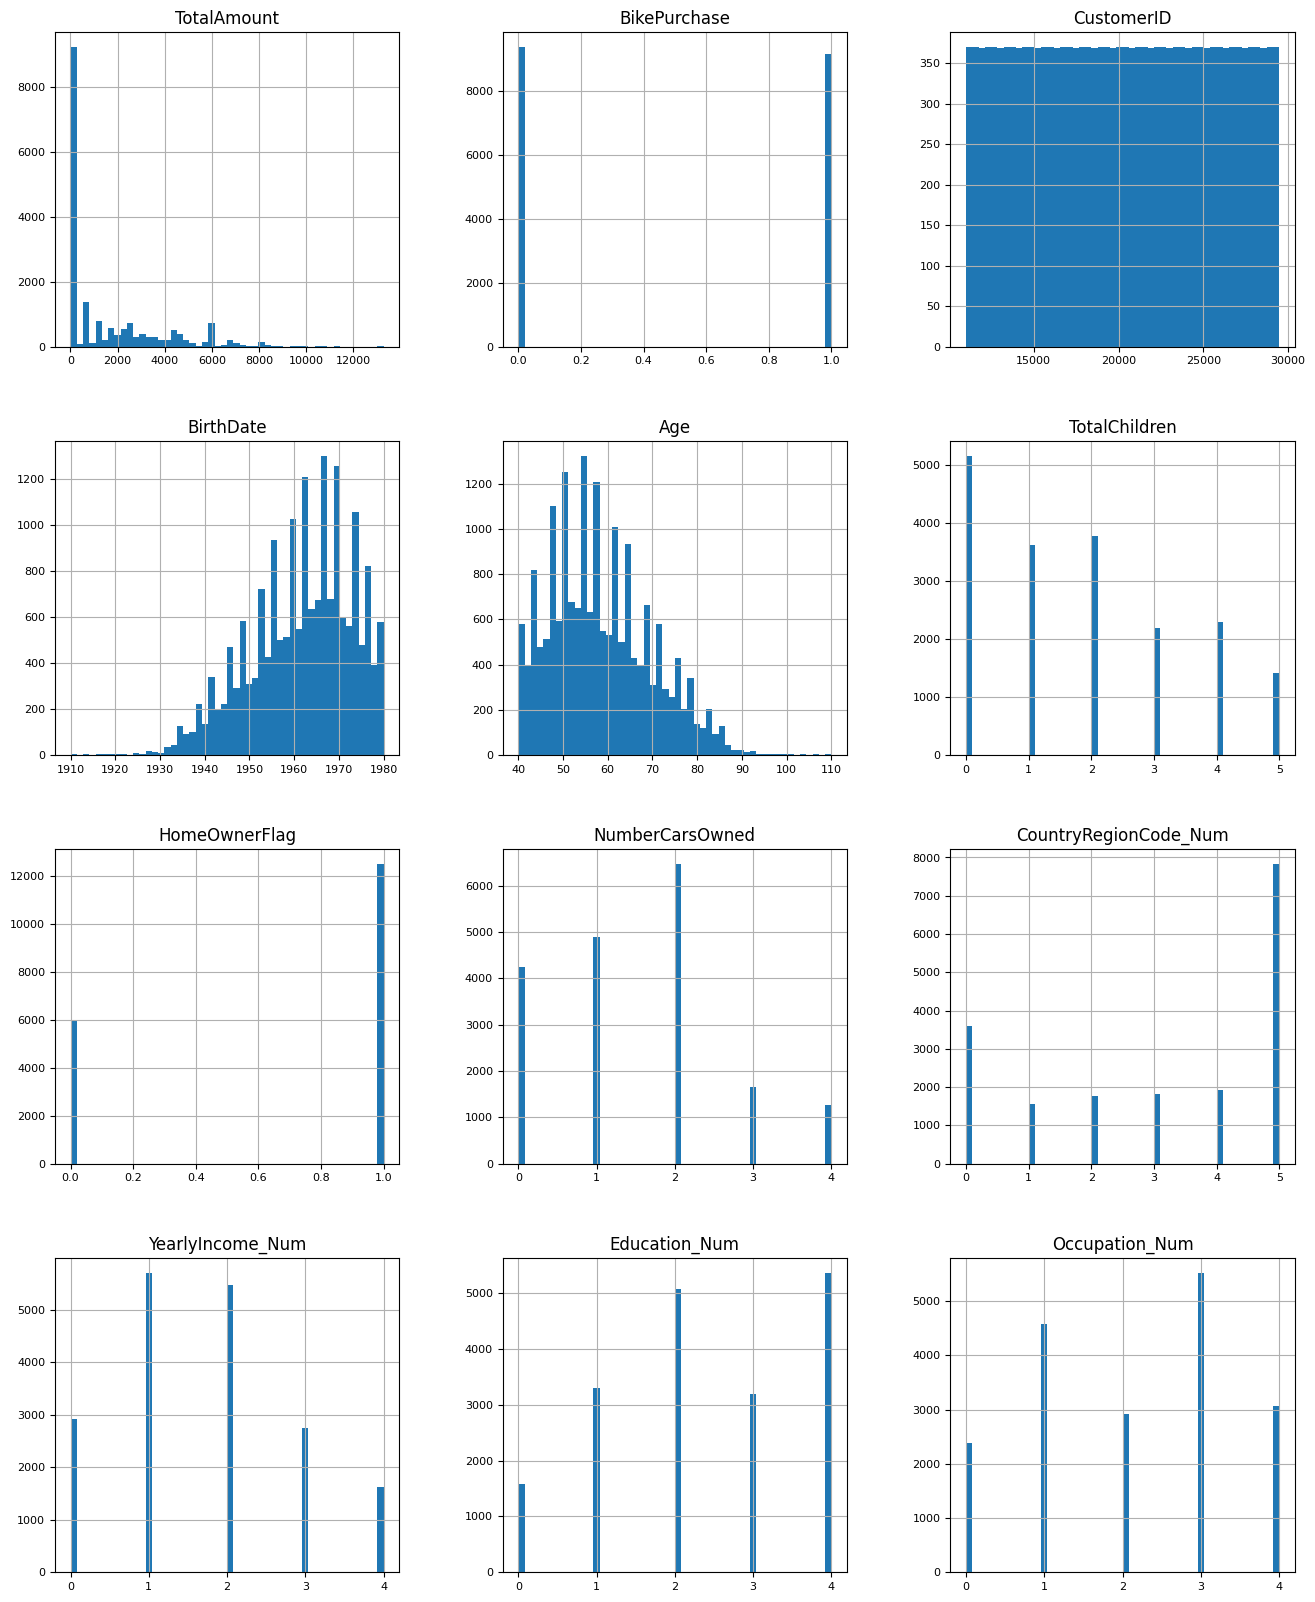

In [10]:
# We visualize the histograms of the numerical variables to know their distribution
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

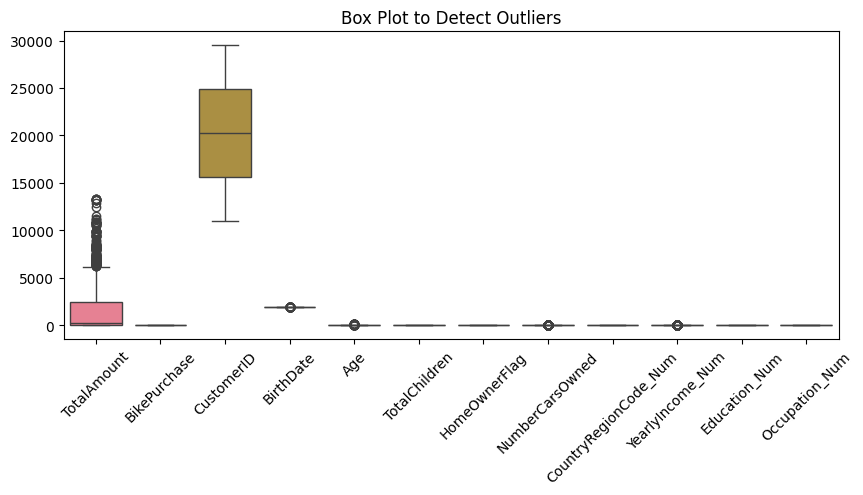

In [11]:
# We visualize the outliers of the variables using a boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title('Box Plot to Detect Outliers')
plt.show()

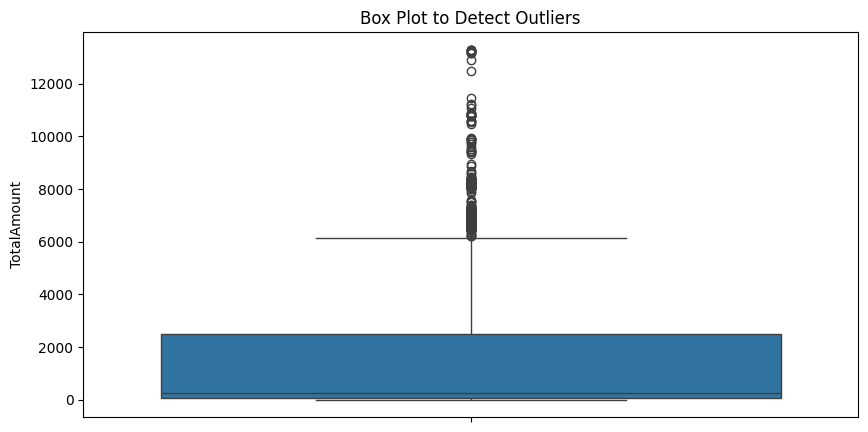

In [12]:
# We visualize the outliers of the variable using a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=data['TotalAmount'])
plt.xticks(rotation=45)
plt.title('Box Plot to Detect Outliers')
plt.show()

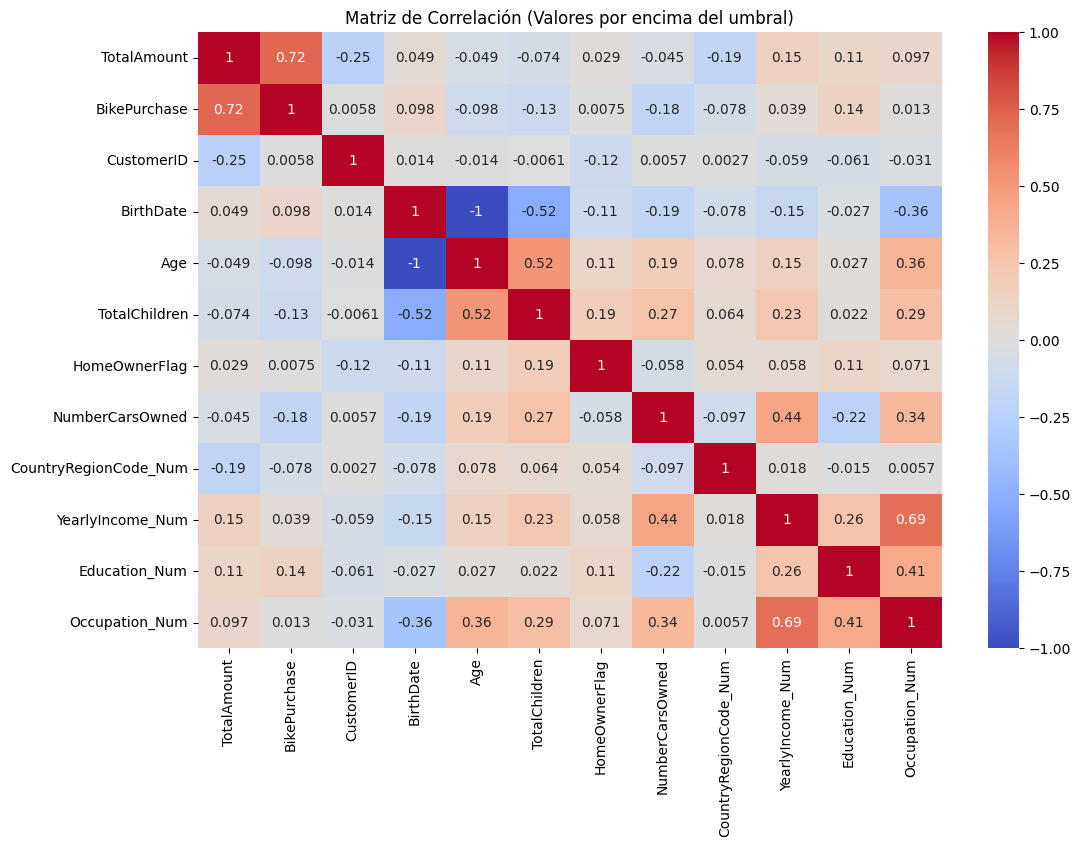

In [13]:
# We make the correlation matrix between the variables
correlation_matrix = data.corr(method ='pearson',numeric_only=True)

# Create a heat map with seaborn
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación (Valores por encima del umbral)')
plt.show()

#Stage 2: Data Preparation
In this stage, the tasks necessary to obtain quality data will be performed. These tasks include checking for null values, identifying categorical variables, and transforming string variables into numeric variables, among others.

In [14]:
# We visualize the total number of null values ​​for each variable in the dataset
data.isnull().sum()

,0
TotalAmount,0
BikePurchase,0
CustomerID,0
PersonType,0
BirthDate,0
Age,0
MaritalStatus,0
Gender,0
TotalChildren,0
HomeOwnerFlag,0


In [15]:
# We delete the CustomerID, PersonType and BirthDate columns
data = data.drop('CustomerID', axis=1)
data = data.drop('PersonType', axis=1)
data = data.drop('BirthDate', axis=1)
data.head(10)

# We visualize the dataset to see if they are correctly deleted
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TotalAmount            18484 non-null  float64
 1   BikePurchase           18484 non-null  int64  
 2   Age                    18484 non-null  int64  
 3   MaritalStatus          18484 non-null  object 
 4   Gender                 18484 non-null  object 
 5   TotalChildren          18484 non-null  int64  
 6   HomeOwnerFlag          18484 non-null  int64  
 7   NumberCarsOwned        18484 non-null  int64  
 8   CountryRegionCode_Num  18484 non-null  int64  
 9   YearlyIncome_Num       18484 non-null  int64  
 10  Education_Num          18484 non-null  int64  
 11  Occupation_Num         18484 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 1.7+ MB


In [16]:
# We notice that the Gender variable is a string. We check the values ​​it takes and its number of occurrences.
data['Gender'].value_counts()

,count
Gender,
M,9351
F,9133


In [17]:
# We convert it to numeric. To do this, we assign the value 0 to the feminine gender and 1 to the masculine gender.
custom_mapping = {
    'F': 0,
    'M': 1
}

# We add a new column with the new equivalent numeric values. We'll call this new column Gender_Num
data['Gender_Num'] = data['Gender'].map(custom_mapping)

In [18]:
# We check the values ​​of the resulting new numeric variable and its number of occurrences to
# check the equivalence with the original variable
data['Gender_Num'].value_counts()

,count
Gender_Num,
1,9351
0,9133


In [19]:
# We eliminate the original Gender column with String type values
data = data.drop('Gender', axis=1)
data.head(10)
# We check that it has been deleted correctly
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TotalAmount            18484 non-null  float64
 1   BikePurchase           18484 non-null  int64  
 2   Age                    18484 non-null  int64  
 3   MaritalStatus          18484 non-null  object 
 4   TotalChildren          18484 non-null  int64  
 5   HomeOwnerFlag          18484 non-null  int64  
 6   NumberCarsOwned        18484 non-null  int64  
 7   CountryRegionCode_Num  18484 non-null  int64  
 8   YearlyIncome_Num       18484 non-null  int64  
 9   Education_Num          18484 non-null  int64  
 10  Occupation_Num         18484 non-null  int64  
 11  Gender_Num             18484 non-null  int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 1.7+ MB


In [20]:
print(data.head(10))

   TotalAmount  BikePurchase  Age MaritalStatus  TotalChildren  HomeOwnerFlag  \
0    8139.2900             1   52             S              0              0   
1    2994.0882             1   82             M              4              1   
2    4118.2600             1   74             S              5              1   
3    4631.1100             1   74             S              5              1   
4    3399.9900             1   56             S              3              0   
5    8121.3300             1   55             S              0              1   
6    8133.0400             1   57             M              4              1   
7    5938.2500             1   48             S              0              0   
8    6051.3100             1   59             M              1              1   
9    5873.2600             1   66             S              2              0   

   NumberCarsOwned  CountryRegionCode_Num  YearlyIncome_Num  Education_Num  \
0                1            

In [21]:
# We do the same process with another string variable: MaritalStatus. We check, as before, the current values ​​of the variable and its number of occurrences.
data['MaritalStatus'].value_counts()

,count
MaritalStatus,
M,10011
S,8473


In [22]:
# We assign the value 0 to married and 1 to single
custom_mapping = {
    'M': 0,
    'S': 1
}

# We add a new column with the new equivalent numeric values, which we call MaritalStatus_Num
data['MaritalStatus_Num'] = data['MaritalStatus'].map(custom_mapping)

In [23]:
# We check the values ​​of the resulting new numeric variable and its number of occurrences to
# check the equivalence with the original variable
data['MaritalStatus_Num'].value_counts()

,count
MaritalStatus_Num,
0,10011
1,8473


In [24]:
# We eliminate the original MaritalStatus column with String values
data = data.drop('MaritalStatus', axis=1)
data.head(10)

# We check that it has been deleted correctly
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TotalAmount            18484 non-null  float64
 1   BikePurchase           18484 non-null  int64  
 2   Age                    18484 non-null  int64  
 3   TotalChildren          18484 non-null  int64  
 4   HomeOwnerFlag          18484 non-null  int64  
 5   NumberCarsOwned        18484 non-null  int64  
 6   CountryRegionCode_Num  18484 non-null  int64  
 7   YearlyIncome_Num       18484 non-null  int64  
 8   Education_Num          18484 non-null  int64  
 9   Occupation_Num         18484 non-null  int64  
 10  Gender_Num             18484 non-null  int64  
 11  MaritalStatus_Num      18484 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 1.7 MB


In [25]:
print(data.head(10))

   TotalAmount  BikePurchase  Age  TotalChildren  HomeOwnerFlag  \
0    8139.2900             1   52              0              0   
1    2994.0882             1   82              4              1   
2    4118.2600             1   74              5              1   
3    4631.1100             1   74              5              1   
4    3399.9900             1   56              3              0   
5    8121.3300             1   55              0              1   
6    8133.0400             1   57              4              1   
7    5938.2500             1   48              0              0   
8    6051.3100             1   59              1              1   
9    5873.2600             1   66              2              0   

   NumberCarsOwned  CountryRegionCode_Num  YearlyIncome_Num  Education_Num  \
0                1                      0                 2              4   
1                2                      5                 3              3   
2                3          

#Stage 3. Data Modeling

In this stage, data modeling will be carried out to **segment** the customer base into groups that share similar characteristics. This customer grouping, or **clustering**, will allow the company to customize its commercial strategies to a specific target audience and maximize its results. The unsupervised machine learning technique **k-means** will be used to carry out this segmentation.

In [26]:
# We import the necessary libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
from sklearn.cluster import KMeans
import numpy as np

In [27]:
# We select the columns that we will use for grouping and create a new dataset with those columns that we will call data_cluster.
seleccion_columnas = ['BikePurchase', 'TotalAmount', 'TotalChildren', 'Education_Num', 'Occupation_Num', 'YearlyIncome_Num']
data_cluster = data[seleccion_columnas]
data_cluster.head(10)

,BikePurchase,TotalAmount,TotalChildren,Education_Num,Occupation_Num,YearlyIncome_Num
0,1,8139.2900,0,4,3,2
1,1,2994.0882,4,3,4,3
2,1,4118.2600,5,4,4,2
3,1,4631.1100,5,1,3,1
4,1,3399.9900,3,1,0,0
5,1,8121.3300,0,4,3,2
6,1,8133.0400,4,4,3,2
7,1,5938.2500,0,4,3,3
8,1,6051.3100,1,1,3,4
9,1,5873.2600,2,2,1,3


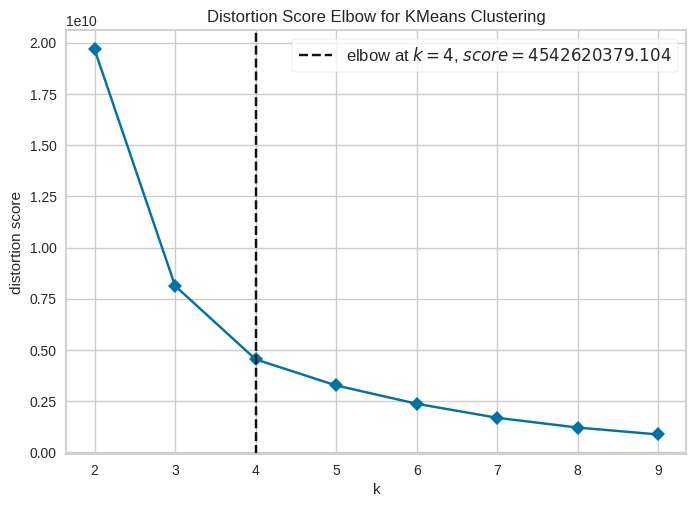

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# We calculate the optimal number of clusters using the elbow method
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(data_cluster)
visualizer.show()

In [29]:
# We apply K-Means with number of clusters = 4
kmeans = KMeans(n_clusters = 4, random_state = 42)
clusters = kmeans.fit_predict(data_cluster)

In [30]:
# We add the clusters column to data_cluster (the new dataset).
data_cluster['Cluster'] = clusters

/tmp/ipython-input-30-1652945022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['Cluster'] = clusters


In [31]:
# We check that the cluster column has been added correctly
data_cluster.head(10)

,BikePurchase,TotalAmount,TotalChildren,Education_Num,Occupation_Num,YearlyIncome_Num,Cluster
0,1,8139.2900,0,4,3,2,2
1,1,2994.0882,4,3,4,3,1
2,1,4118.2600,5,4,4,2,3
3,1,4631.1100,5,1,3,1,3
4,1,3399.9900,3,1,0,0,3
5,1,8121.3300,0,4,3,2,2
6,1,8133.0400,4,4,3,2,2
7,1,5938.2500,0,4,3,3,2
8,1,6051.3100,1,1,3,4,2
9,1,5873.2600,2,2,1,3,2


In [32]:
# We obtain descriptive statistics for each cluster: Cluster 0, cluster 1, cluster 2 and cluster 3
cluster_stats = data_cluster.groupby('Cluster').describe().transpose()

# We show the descriptive statistics
print(cluster_stats)

Cluster                            0            1             2            3
BikePurchase     count  11424.000000  3357.000000   1580.000000  2123.000000
                 mean       0.181898     0.998213      1.000000     1.000000
                 std        0.385777     0.042245      0.000000     0.000000
                 min        0.000000     0.000000      1.000000     1.000000
                 25%        0.000000     1.000000      1.000000     1.000000
                 50%        0.000000     1.000000      1.000000     1.000000
                 75%        0.000000     1.000000      1.000000     1.000000
                 max        1.000000     1.000000      1.000000     1.000000
TotalAmount      count  11424.000000  3357.000000   1580.000000  2123.000000
                 mean     196.949671  2261.990807   6620.269201  4265.282948
                 std      304.621473   526.829591   1104.606245   542.455518
                 min        2.290000  1229.960000   5512.260000  3266.810000

In [33]:
# We group the data by the cluster labels and calculate the mean for each group
cluster_means = data_cluster.groupby('Cluster').mean()

# We show the averages
print(cluster_means)

         BikePurchase  TotalAmount  TotalChildren  Education_Num  \
Cluster                                                            
0            0.181898   196.949671       1.963848       2.285452   
1            0.998213  2261.990807       1.637176       2.568067   
2            1.000000  6620.269201       1.664557       2.622785   
3            1.000000  4265.282948       1.662741       2.609044   

         Occupation_Num  YearlyIncome_Num  
Cluster                                    
0              2.060049          1.609156  
1              2.095025          1.670539  
2              2.533544          2.289873  
3              2.224682          1.799341  


 ***Cluster 0:***
BikePurchase: Almost all customers (approximately 99.65%) have purchased bicycles. TotalAmount: The average budget is around $2,011. TotalChildren: They have an average of 1.57 children. Education_Num: They have an average education level of around 2.58, which could indicate a medium educational level. Occupation_Num: They have an occupation level of around 2.02. YearlyIncome_Num: They have an average annual income of around 1.58.

***Cluster 1:***
BikePurchase: All customers (100%) have purchased bicycles. TotalAmount: The average budget is significantly higher, around $4,136. TotalChildren: They have about 1.71 children. Education_Num: Similar to Cluster 0, with an average education level of around 2.61. Occupation_Num: They have a slightly higher occupation level, with an average of around 2.26. YearlyIncome_Num: They have an average annual income of around 1.85.

***Cluster 2:***
BikePurchase: All customers (100%) have purchased bicycles. TotalAmount: The budget is considerably higher, around $6,616. TotalChildren: They have an average of around 1.67 children. Education_Num: Similar to Cluster 1, with an average education level of around 2.62. Occupation_Num: They have the highest occupation level among the clusters, with an average of around 2.53. YearlyIncome_Num: They have an average annual income of around 2.29.

***Cluster 3:***
BikePurchase: A much smaller percentage of customers (approximately 13.53%) have purchased bicycles in this cluster. TotalAmount: Considerably lower average budget, around $141. TotalChildren: They have an average of around 1.99 children. Education_Num: The average education level is around 2.26. Occupation_Num: They have a somewhat lower occupation level, averaging around 2.07. YearlyIncome_Num: They have an average annual income of around 1.62.

# Stage 4: Evaluation and Presentation of Results

In this stage, we evaluate the quality of the clustering using the Silhouette method and prepare a results report that includes, among other aspects, a description of the problem to be solved, a description of the steps followed in the analysis project, conclusions from the variable analysis, and the usefulness and application of this modeling in the design of new business strategies.

In [34]:
# Import the libraries needed to evaluate the quality of the clusters generated with the Silhouette coefficient

from sklearn.metrics import silhouette_score, silhouette_samples

In [36]:
# We evaluate the quality of the clusters generated with Silhouette
silhouette_avg = silhouette_score(data_cluster[seleccion_columnas], data_cluster['Cluster'])
print(f"The quality of the clusters generated with Silhouette is: {silhouette_avg}")

The quality of the clusters generated with Silhouette is: 0.7467198082500357


 The result of the Silhouette metric with a value of 0.749 indicates that the clustering performed is of good quality, since the points are well grouped within their clusters and well differentiated from the points in other clusters, suggesting that the clusters are coherent and clearly separated, facilitating interpretation and decision-making based on these clusters.

The problem involves a **customer segmentation analysis** based on different demographic characteristics and purchasing behaviors. Using clustering techniques, the objective is to **identify groups of customers who share similar characteristics**. This approach will allow for a better understanding of customer profiles and facilitate the personalization of marketing and sales strategies.

---

***Objectives of the analysis:***
*Customer Segmentation:* Identify groups of similar customers based on their demographic profiles and purchasing patterns.
*Strategy Personalization:* Use segmentation results to design more effective and personalized marketing strategies.
*Resource Optimization:* Improve the efficiency of resource allocation by targeting efforts specifically to each customer segment.

***Analysis of the most relevant data characteristics and their distribution***
*Key Visualizations:* Graphs such as histograms and scatter plots are used to understand the distribution and relationships between variables.
*Statistical Measures:* Descriptive statistics such as means, standard deviations, minimums, maximums, and quartiles were calculated for each variable.
*Relationships between variables:* Correlations between variables were explored to understand how they relate to each other and to purchasing behavior.

***Data Preparation Process Details***
*Data Cleaning:* Data consistency was checked and corrected, addressing missing or inconsistent values ​​if present.

Variable Transformation: Numerical variables were standardized to ensure they all had the same scale and contribution to the model.
*Feature Selection:* The most relevant features were selected for the clustering model based on prior exploratory analysis and correlations.

***Data Model Description***
*Techniques Used:* The K-means clustering algorithm was applied to group customers into clusters based on similarities across multiple dimensions.
Modeling Process Steps:
*Initialization:* An initial number of clusters was selected and the algorithm was run.
*Evaluation:* The elbow method and the silhouette score were used to determine the optimal number of clusters.
*Optimization:* The number of clusters was refined according to the evaluation criteria until a consistent and meaningful segmentation was obtained.

***Conclusions and Results***
*Segmentation Performed:* Four distinct clusters with unique demographic profiles and purchasing behaviors were identified.
Potential Benefits: Segmentation can help design more effective business strategies, such as marketing campaigns specifically targeted to each group. For example:
*Personalization:* Offering products and promotions specifically tailored to the needs and preferences of each segment.
*Customer Retention:* Improving customer loyalty and retention by better understanding their behaviors and offering them more personalized experiences.
*Marketing Efficiency:* Optimize marketing spending by directing efforts toward segments with the highest conversion potential.
In short, customer segmentation analysis not only provides a deeper understanding of the customer base but can also drive more informed and effective strategic decisions within the company.

---

The analysis has revealed the existence of several well-defined segments within the customer base. Each segment presents unique characteristics that can be leveraged to design specific commercial strategies. For example:

***Segment 1:*** Young customers with high incomes and a preference for premium service plans. This group can be targeted with value-added offers and exclusive services.
***Segment 2:*** Older customers with moderate incomes who prefer basic plans and seek service stability. Retention strategies and loyalty programs can be effective here.
***Segment 3:*** Middle-aged customers with variable spending and a tendency to change plans frequently. Cross-selling and upselling campaigns may be appropriate for this segment.

Segmentation allows companies to personalize their communications and offers, optimizing the use of resources and improving customer satisfaction. In short, this analysis provides a solid basis for strategic decisions and the development of targeted marketing campaigns, thereby improving the efficiency and effectiveness of commercial initiatives.